# Se separan los nodos y se ajusta el timestamp correspondiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import funs
pd.options.display.max_rows = 10

In [2]:
df = pd.read_csv('all_nodos.csv')
df

,id_Variable,id_nodo,Temperatura,Humedad,Hum. Tierra,Nivel_UV,INT. LUMÍN,Carga,RSSI,T_SERVIDOR,T_NODO,TRY,FECHA,AÑO,MES,DIA,HORA,MINUTO,TIPO_Nodo
0,1,4,0,0,0.00,0,0,0.00,39,336,170,63,NaN,2018,4,27,8,17,3
1,2,5,0,0,0.00,0,0,0.00,0,1926,1678,63,NaN,2018,4,27,8,17,3
2,3,3,30,42,0.01,0,1038,0.60,55,0,117,68,NaN,2018,4,27,8,17,0
3,4,2,30,44,0.01,0,791,-11.67,56,0,105,0,NaN,2018,4,27,8,18,0
4,5,6,30,44,0.01,12,5777,0.59,46,291,125,0,NaN,2018,4,27,8,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,50497,8,60,78,0.98,0,5853,1.33,87,389,139,0,NaN,2018,6,11,9,17,3
50497,50498,3,32,29,1.14,0,5835,-11.67,84,0,0,0,NaN,2018,6,11,9,17,0
50498,50499,2,32,17,0.82,0,5853,1.69,83,0,0,0,NaN,2018,6,11,9,17,0
50499,50500,5,33,29,6.43,0,5865,1.50,82,0,0,0,NaN,2018,6,11,9,17,0


## Se suprimen las columnas que no se necesitan

In [3]:
df.drop(columns=['T_NODO', 'TRY', 'FECHA', 'Carga', 'RSSI', 'T_SERVIDOR', 'TIPO_Nodo'], inplace = True)
df

,id_Variable,id_nodo,Temperatura,Humedad,Hum. Tierra,Nivel_UV,INT. LUMÍN,AÑO,MES,DIA,HORA,MINUTO
0,1,4,0,0,0.00,0,0,2018,4,27,8,17
1,2,5,0,0,0.00,0,0,2018,4,27,8,17
2,3,3,30,42,0.01,0,1038,2018,4,27,8,17
3,4,2,30,44,0.01,0,791,2018,4,27,8,18
4,5,6,30,44,0.01,12,5777,2018,4,27,8,18
...,...,...,...,...,...,...,...,...,...,...,...,...
50496,50497,8,60,78,0.98,0,5853,2018,6,11,9,17
50497,50498,3,32,29,1.14,0,5835,2018,6,11,9,17
50498,50499,2,32,17,0.82,0,5853,2018,6,11,9,17
50499,50500,5,33,29,6.43,0,5865,2018,6,11,9,17


df.HORA = [int(df.HORA[x])-3 for x in range(len(df))]
ind_rem = [[x, df.HORA[x]+21] for x in range(len(df)) if df.HORA[x]<0]
df.loc[pd.DataFrame(ind_rem).iloc[:,0],'HORA'] = pd.DataFrame(ind_rem).iloc[:,1].values
df

## Se introduce un cero antes de las unidades de las columnas MES, DIA, HORA, MINUTO

In [4]:
ind_rem = {}
for i in ['MES','DIA','HORA','MINUTO']:
    ind_rem[i] = [[x,'0'+str(df[i][x])] for x in range(len(df)) if df[i][x] < 10]
    df.loc[pd.DataFrame(ind_rem[i]).iloc[:,0],i] = pd.DataFrame(ind_rem[i]).iloc[:,1].values
df

,id_Variable,id_nodo,Temperatura,Humedad,Hum. Tierra,Nivel_UV,INT. LUMÍN,AÑO,MES,DIA,HORA,MINUTO
0,1,4,0,0,0.00,0,0,2018,04,27,08,17
1,2,5,0,0,0.00,0,0,2018,04,27,08,17
2,3,3,30,42,0.01,0,1038,2018,04,27,08,17
3,4,2,30,44,0.01,0,791,2018,04,27,08,18
4,5,6,30,44,0.01,12,5777,2018,04,27,08,18
...,...,...,...,...,...,...,...,...,...,...,...,...
50496,50497,8,60,78,0.98,0,5853,2018,06,11,09,17
50497,50498,3,32,29,1.14,0,5835,2018,06,11,09,17
50498,50499,2,32,17,0.82,0,5853,2018,06,11,09,17
50499,50500,5,33,29,6.43,0,5865,2018,06,11,09,17


## Se crea una columna con la estrucutura AÑO+MES+DIA+HORA+MINUTO

In [5]:
df['TIME'] = [str(df.AÑO[i])+str(df.MES[i])+str(df.DIA[i])+str(df.HORA[i])+str(df.MINUTO[i]) for i in range(len(df))]
df.TIME

0        201804270817
1        201804270817
2        201804270817
3        201804270818
4        201804270818
             ...     
50496    201806110917
50497    201806110917
50498    201806110917
50499    201806110917
50500    201806110918
Name: TIME, Length: 50501, dtype: object

## Se convierte la columna TIME al fomato Timestamp

In [6]:
df['TIME'] = [pd.Timestamp(x) for x in df['TIME']]
df

,id_Variable,id_nodo,Temperatura,Humedad,Hum. Tierra,Nivel_UV,INT. LUMÍN,AÑO,MES,DIA,HORA,MINUTO,TIME
0,1,4,0,0,0.00,0,0,2018,04,27,08,17,2018-04-27 08:17:00
1,2,5,0,0,0.00,0,0,2018,04,27,08,17,2018-04-27 08:17:00
2,3,3,30,42,0.01,0,1038,2018,04,27,08,17,2018-04-27 08:17:00
3,4,2,30,44,0.01,0,791,2018,04,27,08,18,2018-04-27 08:18:00
4,5,6,30,44,0.01,12,5777,2018,04,27,08,18,2018-04-27 08:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,50497,8,60,78,0.98,0,5853,2018,06,11,09,17,2018-06-11 09:17:00
50497,50498,3,32,29,1.14,0,5835,2018,06,11,09,17,2018-06-11 09:17:00
50498,50499,2,32,17,0.82,0,5853,2018,06,11,09,17,2018-06-11 09:17:00
50499,50500,5,33,29,6.43,0,5865,2018,06,11,09,17,2018-06-11 09:17:00


## Se suprimen las colunas que no se van a utilizar

In [7]:
df.drop(columns = ['AÑO','MES','DIA','MINUTO'], inplace = True)
df

,id_Variable,id_nodo,Temperatura,Humedad,Hum. Tierra,Nivel_UV,INT. LUMÍN,HORA,TIME
0,1,4,0,0,0.00,0,0,08,2018-04-27 08:17:00
1,2,5,0,0,0.00,0,0,08,2018-04-27 08:17:00
2,3,3,30,42,0.01,0,1038,08,2018-04-27 08:17:00
3,4,2,30,44,0.01,0,791,08,2018-04-27 08:18:00
4,5,6,30,44,0.01,12,5777,08,2018-04-27 08:18:00
...,...,...,...,...,...,...,...,...,...
50496,50497,8,60,78,0.98,0,5853,09,2018-06-11 09:17:00
50497,50498,3,32,29,1.14,0,5835,09,2018-06-11 09:17:00
50498,50499,2,32,17,0.82,0,5853,09,2018-06-11 09:17:00
50499,50500,5,33,29,6.43,0,5865,09,2018-06-11 09:17:00


In [8]:
old_names = ['id_Variable','id_nodo','Temperatura','Humedad','Hum. Tierra','Nivel_UV','INT. LUMÍN'] 
new_names = ['id_Variable','NODO','TEMPERATURA','HUMEDAD RELATIVA','HUMEDAD DE LA TIERRA','NIVEL UV','INTENSIDAD LUMÍNICA']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df

,id_Variable,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,HORA,TIME
0,1,4,0,0,0.00,0,0,08,2018-04-27 08:17:00
1,2,5,0,0,0.00,0,0,08,2018-04-27 08:17:00
2,3,3,30,42,0.01,0,1038,08,2018-04-27 08:17:00
3,4,2,30,44,0.01,0,791,08,2018-04-27 08:18:00
4,5,6,30,44,0.01,12,5777,08,2018-04-27 08:18:00
...,...,...,...,...,...,...,...,...,...
50496,50497,8,60,78,0.98,0,5853,09,2018-06-11 09:17:00
50497,50498,3,32,29,1.14,0,5835,09,2018-06-11 09:17:00
50498,50499,2,32,17,0.82,0,5853,09,2018-06-11 09:17:00
50499,50500,5,33,29,6.43,0,5865,09,2018-06-11 09:17:00


In [9]:
df = df.iloc[2822::,:].reset_index(drop = True)
df

,id_Variable,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,HORA,TIME
0,2823,2,27,19,74.97,0,5853,12,2018-05-09 12:38:00
1,2824,6,0,0,0.00,0,0,12,2018-05-09 12:38:00
2,2825,3,27,65,94.07,0,5824,12,2018-05-09 12:49:00
3,2826,6,0,0,0.00,0,0,12,2018-05-09 12:49:00
4,2827,2,28,19,72.72,0,5865,12,2018-05-09 12:49:00
...,...,...,...,...,...,...,...,...,...
47674,50497,8,60,78,0.98,0,5853,09,2018-06-11 09:17:00
47675,50498,3,32,29,1.14,0,5835,09,2018-06-11 09:17:00
47676,50499,2,32,17,0.82,0,5853,09,2018-06-11 09:17:00
47677,50500,5,33,29,6.43,0,5865,09,2018-06-11 09:17:00


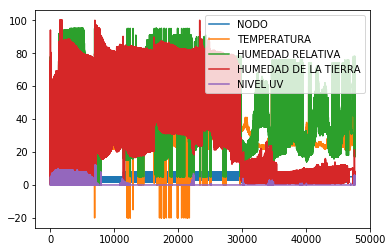

In [10]:
df.iloc[:,[1,2,3,4,5]].plot()

In [11]:
df

,id_Variable,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,HORA,TIME
0,2823,2,27,19,74.97,0,5853,12,2018-05-09 12:38:00
1,2824,6,0,0,0.00,0,0,12,2018-05-09 12:38:00
2,2825,3,27,65,94.07,0,5824,12,2018-05-09 12:49:00
3,2826,6,0,0,0.00,0,0,12,2018-05-09 12:49:00
4,2827,2,28,19,72.72,0,5865,12,2018-05-09 12:49:00
...,...,...,...,...,...,...,...,...,...
47674,50497,8,60,78,0.98,0,5853,09,2018-06-11 09:17:00
47675,50498,3,32,29,1.14,0,5835,09,2018-06-11 09:17:00
47676,50499,2,32,17,0.82,0,5853,09,2018-06-11 09:17:00
47677,50500,5,33,29,6.43,0,5865,09,2018-06-11 09:17:00


numpy.int64

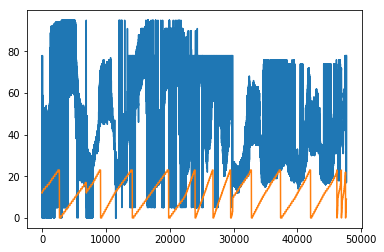

In [12]:
df.HORA = [int(df.HORA[x]) for x in range(len(df))]
#plt.plot(df.HORA)
plt.plot(df['HUMEDAD RELATIVA'])
plt.plot(df.HORA)
type(df['INTENSIDAD LUMÍNICA'][2])

In [13]:
n = df.NODO.value_counts()
print(n)
nodos  = n.index.tolist()

3    14363
5    11771
2    11042
8     8440
6     1669
4      394
Name: NODO, dtype: int64


In [14]:
df['HOR'] = df.HORA.copy()
df.HOR = [int(df.HOR[x])-3 for x in range(len(df))]
ind_rem = [[x, df.HOR[x]+24] for x in range(len(df)) if df.HOR[x]<0]
df.loc[pd.DataFrame(ind_rem).iloc[:,0],'HOR'] = pd.DataFrame(ind_rem).iloc[:,1].values
df

,id_Variable,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,HORA,TIME,HOR
0,2823,2,27,19,74.97,0,5853,12,2018-05-09 12:38:00,9
1,2824,6,0,0,0.00,0,0,12,2018-05-09 12:38:00,9
2,2825,3,27,65,94.07,0,5824,12,2018-05-09 12:49:00,9
3,2826,6,0,0,0.00,0,0,12,2018-05-09 12:49:00,9
4,2827,2,28,19,72.72,0,5865,12,2018-05-09 12:49:00,9
...,...,...,...,...,...,...,...,...,...,...
47674,50497,8,60,78,0.98,0,5853,9,2018-06-11 09:17:00,6
47675,50498,3,32,29,1.14,0,5835,9,2018-06-11 09:17:00,6
47676,50499,2,32,17,0.82,0,5853,9,2018-06-11 09:17:00,6
47677,50500,5,33,29,6.43,0,5865,9,2018-06-11 09:17:00,6


In [15]:
tabla = {}
for i in nodos:
    tabla[i] = df.query('NODO == %s' %i).reset_index(drop=True)
    
    
    

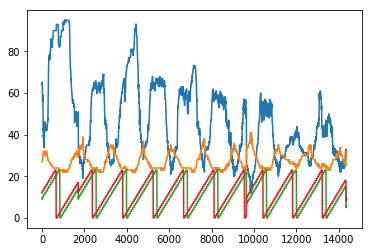

In [27]:
plt.plot(tabla[3]['HUMEDAD RELATIVA'])
plt.plot(tabla[3]['TEMPERATURA'])
plt.plot(tabla[3].HOR)
plt.plot(tabla[3].HORA)

In [30]:
%matplotlib qt
plt.plot(tabla[3].TIME,tabla[3].TEMPERATURA)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

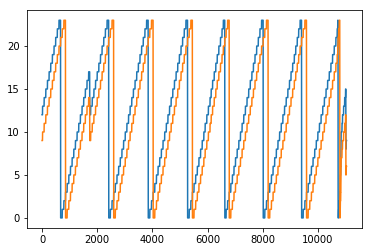

In [18]:
plt.plot(tabla[2].HORA)
plt.plot(tabla[2].HOR)

In [20]:
n = df.HOR.value_counts()
print(n)
nodos  = n.index.tolist()
nodos

11    2523
12    2515
10    2490
13    2463
14    2291
      ... 
5     1770
2     1745
1     1729
3     1711
4     1695
Name: HOR, Length: 24, dtype: int64


[11,
 12,
 10,
 13,
 14,
 16,
 15,
 17,
 9,
 18,
 8,
 21,
 7,
 23,
 6,
 22,
 20,
 19,
 0,
 5,
 2,
 1,
 3,
 4]